In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# df作成

In [2]:
data = "data/stats05.csv"
df = pd.read_csv(data)
df

,sample
0,-0.037
1,-0.407
2,-3.156
3,-0.539
4,-1.496
...,...
495,-11.154
496,-11.796
497,-10.799
498,-12.723


# ヒストグラム

(array([23., 92., 74., 81., 65., 63., 38., 36., 14., 14.]),
 array([-13.459 , -12.1168, -10.7746,  -9.4324,  -8.0902,  -6.748 ,
         -5.4058,  -4.0636,  -2.7214,  -1.3792,  -0.037 ]),
 <BarContainer object of 10 artists>)

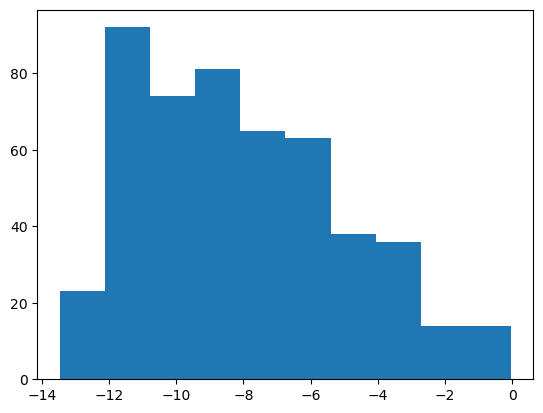

In [3]:
plt.hist(df)

# 密度分布

(array([0.03427209, 0.13708836, 0.11026673, 0.12069736, 0.09685591,
        0.09387573, 0.05662345, 0.05364327, 0.02086127, 0.02086127]),
 array([-13.459 , -12.1168, -10.7746,  -9.4324,  -8.0902,  -6.748 ,
         -5.4058,  -4.0636,  -2.7214,  -1.3792,  -0.037 ]),
 <BarContainer object of 10 artists>)

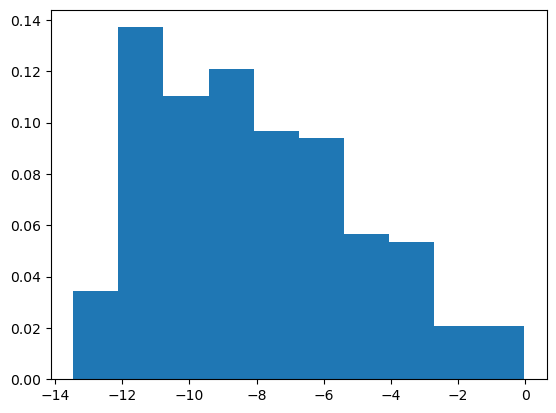

In [7]:
plt.hist(df, density=True)

# 期待値、分散、歪度、尖度、平均中心の５次モーメント

In [4]:
# 期待値
def calculate_expectation(data):
    return np.mean(data)

# 分散
def calculate_variance(data):
    return np.var(data, ddof=0) 

# 歪度
def calculate_skewness(data):
    return ss.skew(data)

# 尖度
def calculate_kurtosis(data):
    return ss.kurtosis(data)

# 平均中心の5次モーメント
def calculate_fifth_moment(data):
    centered_data = data - np.mean(data)
    fifth_moment = np.mean(centered_data**5)
    return fifth_moment


for column in df.columns:
    if df[column].dtype in ['int64', 'float64']: 
        data = df[column].values
        
        print(f"期待値: {calculate_expectation(data):.2f}")
        print(f"分散: {calculate_variance(data):.2f}")
        print(f"歪度: {calculate_skewness(data):.2f}")
        print(f"尖度: {calculate_kurtosis(data):.2f}")
        print(f"平均中心の5次モーメント: {calculate_fifth_moment(data):.2f}")

期待値: -8.03
分散: 9.26
歪度: 0.50
尖度: -0.55
平均中心の5次モーメント: 783.37


<Figure size 1200x800 with 0 Axes>

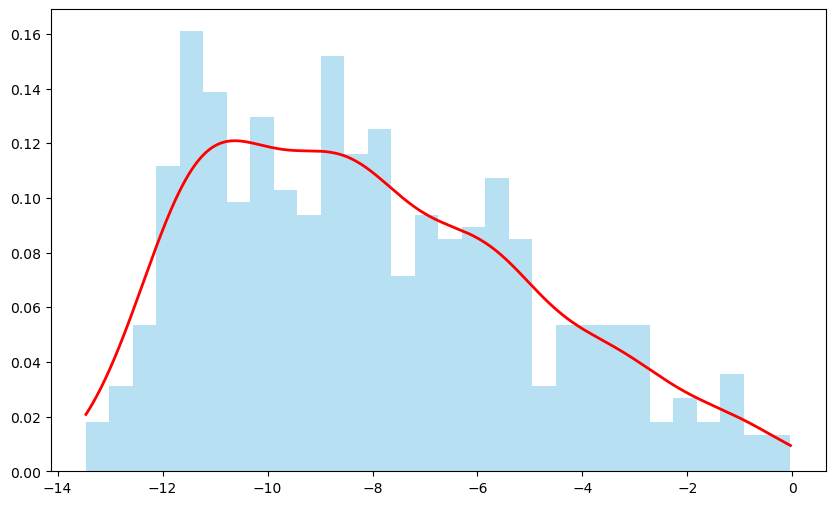

In [5]:
plt.figure(figsize=(12, 8))

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        
        counts, bins, _ = plt.hist(df[column], bins=30, density=True, alpha=0.6, color='skyblue', label='ヒストグラム')
        
        density = ss.gaussian_kde(df[column])
        
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        
        plt.plot(x, density(x), 'r-', linewidth=2, label='確率密度関数')
        
